In [38]:
import pandas as pd
import numpy as np

RIAUS = pd.read_csv(r'../input/weather-dataset-rattle-package/weatherAUS.csv')
RIAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [39]:
RIAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [40]:
RIAUS.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [41]:
RIAUS['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [42]:
RIAUS['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [43]:
RIAUS['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [44]:
RIAUS['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
RIAUS['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
RIAUS.dropna(inplace = True)

In [47]:
RIAUS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
k = RIAUS['WindGustDir']
RIAUS['WindGustDir'] = encoder.fit_transform(k)

In [49]:
k = RIAUS['WindDir9am']
RIAUS['WindDir9am'] = encoder.fit_transform(k)

k = RIAUS['WindDir3pm']
RIAUS['WindDir3pm'] = encoder.fit_transform(k)

k = RIAUS['RainToday']
RIAUS['RainToday'] = encoder.fit_transform(k)

k = RIAUS['RainTomorrow']
RIAUS['RainTomorrow'] = encoder.fit_transform(k)

k = RIAUS['Location']
RIAUS['Location'] = encoder.fit_transform(k)

In [50]:
RIAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [51]:
X = RIAUS.iloc[ : , 1 : 22]

In [52]:
X['Evap - Sun'] = X['Evaporation'] - X['Sunshine']

In [53]:
X['WS * Cloud3pm * Sunshine * MinTemp'] = X['WindSpeed3pm'] * X['Sunshine'] * X['Cloud3pm'] * X['MinTemp']

In [54]:
X['MaxT - MinT'] = X['MaxTemp'] - X['MinTemp']

In [55]:
X['WindDir'] = X['WindDir3pm'] - X['WindDir9am']

In [56]:
X['WindSpeed'] = X['WindSpeed3pm'] - X['WindSpeed9am']

In [57]:
X['Humidity'] = X['Humidity3pm'] - X['Humidity9am']

In [58]:
X['Pressure'] = X['Pressure3pm'] - X['Pressure9am']

In [59]:
X['Cloud'] = X['Cloud3pm'] - X['Cloud9am']

In [60]:
X['Temp'] = X['Temp3pm'] - X['Temp9am']

In [61]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainToday,Evap - Sun,WS * Cloud3pm * Sunshine * MinTemp,MaxT - MinT,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,0,-0.3,22017.00,17.3,11,14.0,-7.0,-1.9,3.0,6.8
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,0,1.8,4544.80,10.5,0,0.0,-22.0,-0.8,0.0,6.7
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,0,0.2,18507.60,18.2,1,-15.0,-20.0,-3.1,5.0,6.2
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,0,-0.8,8015.40,16.5,1,0.0,-15.0,-3.6,4.0,6.5
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,0,2.8,15855.84,16.8,7,-4.0,-4.0,-3.3,5.0,4.0


In [62]:
K = X

In [63]:
#K.drop(['WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
         #'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], inplace = True, axis = 1)

In [64]:
y = RIAUS['RainTomorrow']

In [65]:
K.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainToday,Evap - Sun,WS * Cloud3pm * Sunshine * MinTemp,MaxT - MinT,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,0,-0.3,22017.00,17.3,11,14.0,-7.0,-1.9,3.0,6.8
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,0,1.8,4544.80,10.5,0,0.0,-22.0,-0.8,0.0,6.7
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,0,0.2,18507.60,18.2,1,-15.0,-20.0,-3.1,5.0,6.2
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,0,-0.8,8015.40,16.5,1,0.0,-15.0,-3.6,4.0,6.5
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,0,2.8,15855.84,16.8,7,-4.0,-4.0,-3.3,5.0,4.0


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(K)
K = scaled_data

In [67]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 10, objective = 'binary:logistic', 
                      eval_metric = 'error', use_label_encoder=False)

#cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

score = cross_val_score(model, K, y, cv = 5)
score.mean()

0.8120701878766393

In [68]:
import eli5
from eli5.sklearn import PermutationImportance

model.fit(K, y)

perm = PermutationImportance(model, random_state = 1).fit(K, y)

In [69]:
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0995 ± 0.0009,Humidity3pm
0.0647 ± 0.0014,WindGustSpeed
0.0622 ± 0.0009,Sunshine
0.0412 ± 0.0010,Pressure3pm
0.0296 ± 0.0014,Pressure
0.0274 ± 0.0007,Location
0.0189 ± 0.0005,WS * Cloud3pm * Sunshine * MinTemp
0.0180 ± 0.0008,Rainfall
0.0127 ± 0.0009,Cloud3pm
0.0121 ± 0.0005,Evap - Sun


In [70]:
w = eli5.show_weights(perm, feature_names = X.columns.tolist(), top = 30)
result = pd.read_html(w.data)[0]
result

,Weight,Feature
0,0.0995 ± 0.0009,Humidity3pm
1,0.0647 ± 0.0014,WindGustSpeed
2,0.0622 ± 0.0009,Sunshine
3,0.0412 ± 0.0010,Pressure3pm
4,0.0296 ± 0.0014,Pressure
5,0.0274 ± 0.0007,Location
6,0.0189 ± 0.0005,WS * Cloud3pm * Sunshine * MinTemp
7,0.0180 ± 0.0008,Rainfall
8,0.0127 ± 0.0009,Cloud3pm
9,0.0121 ± 0.0005,Evap - Sun


In [71]:
from sklearn.decomposition import PCA

pca = PCA()

components = pca.fit_transform(K)
components_df = pd.DataFrame(components)

<AxesSubplot:>

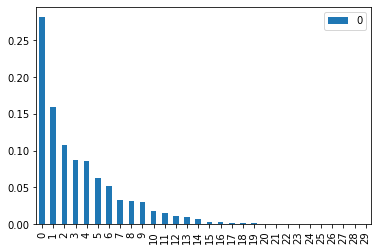

In [72]:
EVR = pd.DataFrame(pca.explained_variance_ratio_)
EVR.plot(kind = 'bar')

In [73]:
pca2 = PCA(n_components = 10)
components2 = pca2.fit_transform(K)
components2_df = pd.DataFrame(components2)

In [74]:
score2 = cross_val_score(model, components2_df, y, cv = 5)
score2.mean()

0.8237504431052818